<a href="https://colab.research.google.com/github/jinsooya/emba/blob/main/06_working_with_llm_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

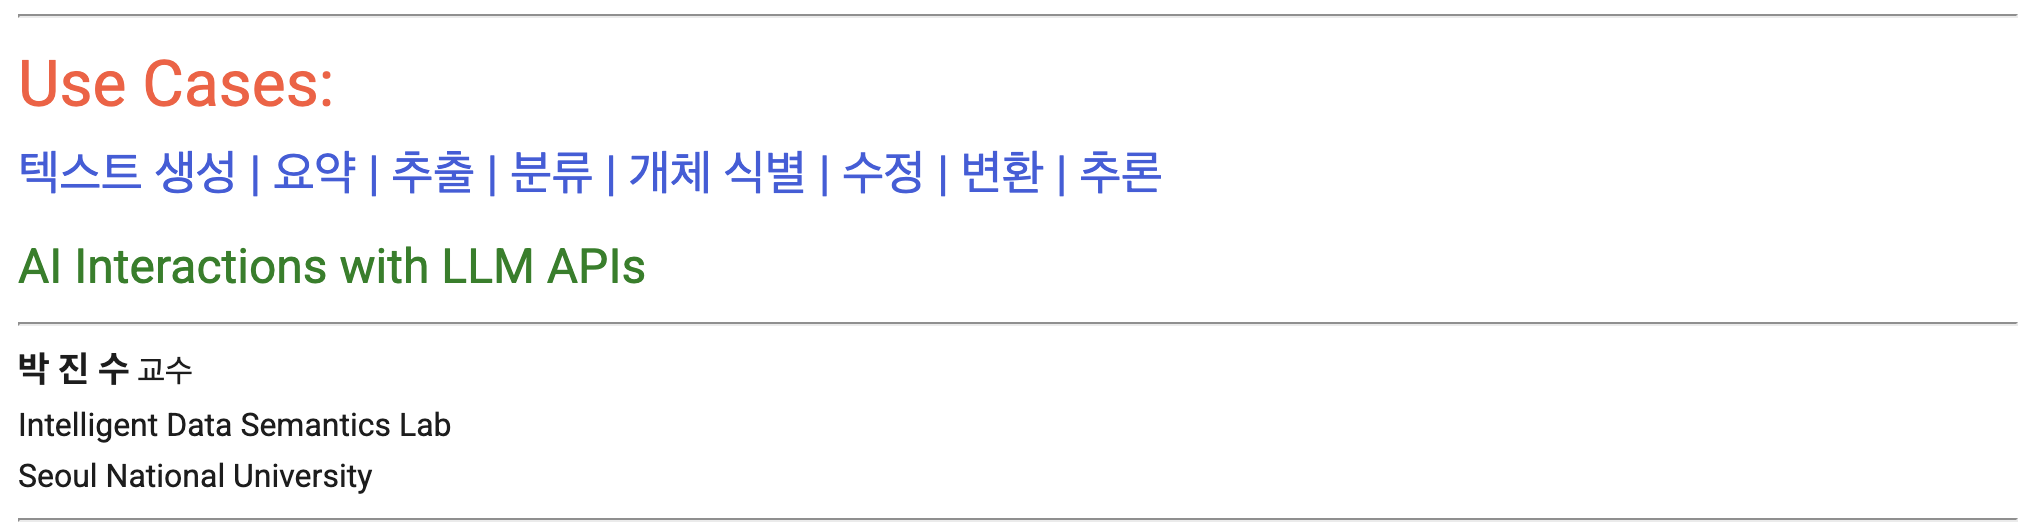

- - -    

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**<font size='+2'>목차**

>[패키지 설치 및 API 설정](#scrollTo=M_ZVjZ45zfHj)

>>[Setting Up the MistralAI API](#scrollTo=p1YmqIgtgYpK)

>>[Setting Up the Groq API](#scrollTo=F-eMvvKEgYpL)

>>[Setting Up the Google API](#scrollTo=OLZyjGUVgYpL)

>>[Setting Up the Anthropic API](#scrollTo=9_ESx0XEgYpP)

>>[Setting Up the OpenAI API](#scrollTo=H5CXeJ2ogYpP)

>[도우미 함수](#scrollTo=gdzvu749qPfV)

>[메시지와 역할 : 기본 예시](#scrollTo=Cp9BYJPOkeNu)

>[특정 그룹을 위한 텍스트 생성](#scrollTo=MSXmHOnup7qt)

>[홍보 자료 작성](#scrollTo=aJ47ZB2IZrbh)

>[고객 응대 편지 작성](#scrollTo=3czEngwqVHih)

>[랩 노래 생성 (과제 4)](#scrollTo=NhQUKVU3MQ0s)

>[텍스트 요약](#scrollTo=YsL57K7Ep7qu)

>[여러 제품 리뷰 요약 (과제 4)](#scrollTo=ovXNrGYRQzib)

>[키워드 추출](#scrollTo=URommtQNp7qv)

>[리뷰 분류기](#scrollTo=szI5lp0sp7qv)

>[고객 요청 분류](#scrollTo=6QkB8b-uFUL-)

>[개체 식별](#scrollTo=tVknCegyp7qv)

>>[제조사와 제품 이름 식별](#scrollTo=vzWdVmT_r1Km)

>>[문서 분류](#scrollTo=lXmnbX_X4dEt)

>>[명소 및 식당과 카페 표시](#scrollTo=uy2DgaGqDjz-)

>>[명소•식당•카페 이름을 각각 분리 추출](#scrollTo=EO4-TEA7WrMu)

>>[식별한 개체들로 휴가 계획 세우기](#scrollTo=AaiZrlJqQ4dT)

>[감성 분석 및 객체 식별 (과제 4)](#scrollTo=m003dPgoqOxH)

>[문장 오류 수정](#scrollTo=jOdkq94kp7qv)

>[여러 문장의 오류 수정 (과제 4)](#scrollTo=3ixzX6L4wBxd)

>[웹 페이지 제작](#scrollTo=9vsO9mrsp7qw)

>[자연어를 SQL로 변환](#scrollTo=JVbS1pEMp7qx)

>[여러 언어로 동시 번역](#scrollTo=R6p1jwaqGysU)

>[범용 번역기 (과제 4)](#scrollTo=xZkM2PqJ0wwb)

>[어조 변환](#scrollTo=kIuBOde1GysU)

>[사고 추론 과정 검증](#scrollTo=T36BPF4UDNFC)

>[Tree of Thoughts](#scrollTo=KYYMLzOIOKRt)

>[ReAct](#scrollTo=l8_eFsDx47qF)

>[추론 모델](#scrollTo=TTKMRnpX47qO)



# 패키지 설치 및 API 설정

In [ ]:
!python -m pip install --quiet litellm mistralai groq google-genai anthropic openai
print('--- Job Completed', '-' * 55, '\n')

## Setting Up the MistralAI API

**<font size='+1'>MistralAI API Key 발급</font>**
- API Key 발급 및 MistralAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1eiRVg-hTGhN2SrJz0R7Qsn0ZS6Pw7HHd/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'MISTRAL_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['MISTRAL_API_KEY'] = userdata.get('MISTRAL_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from google.colab import userdata
os.environ['MISTRAL_API_KEY'] = getpass.getpass('Enter Your MistralAI API Key: ')

## Setting Up the Groq API

**<font size='+1'>Groq API Key 발급</font>**
- API Key 발급 및 Groq에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1E267hPCwahSbaKWVeCPQp2ksW8T9VsTG/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GROQ_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['GROQ_API_KEY'] = getpass.getpass('Enter Your Groq API Key: ')

## Setting Up the Google API

**<font size='+1'>Google Gemini API Key 발급</font>**
- API Key 발급 및 Google Gemini 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1YLy4B4RkD6Y3HnpScpKd0trPZxKvUsXa/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GOOGLE_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['GEMINI_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['GEMINI_API_KEY'] = os.environ['GOOGLE_API_KEY'] = getpass.getpass('Enter Your Google Gemini API Key: ')

## Setting Up the Anthropic API

**<font size='+1'>Anthropic API Key 발급</font>**
- API Key 발급 및 Anthropic 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1u9q-0_gCc6wmRAXNctQj8ApLRhOtYYpX/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'ANTHROPIC_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['ANTHROPIC_API_KEY'] = userdata.get('ANTHROPIC_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['ANTHROPIC_API_KEY'] = getpass.getpass('Enter Your Anthropic API Key: ')

## Setting Up the OpenAI API

**<font size='+1'>OpenAI API Key 발급</font>**
- API Key 발급 및 OpenAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/122mEaoTYAYOPehBfChfOkNLHbZrDge3C/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'OPENAI_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('Enter Your OpenAI API Key: ')

# 도우미 함수

In [ ]:
# Colab의 출력 결과를 자동으로 줄바꿈한다.
from IPython.display import HTML, display

def set_css():
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;
        }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# --- 파일을 읽고 출력하는 함수 정의
from pathlib import Path

def load_doc(folder, filename):
    """
    지정된 폴더와 파일명을 받아 텍스트 파일을 읽어 문자열로 반환한다.

    Parameters:
        folder (Path | str | None): 파일이 위치한 폴더
            None, '' 또는 '.' 이면 현재 작업 디렉터리를 사용한다.
        filename (Path | str): 읽어올 파일 이름 또는 경로
    Returns:
        str: 파일 전체 텍스트 내용
    """
    base = Path(folder) if folder and folder != '.' else Path.cwd()
    file_path = base / filename
    return file_path.read_text(encoding='utf-8')

def print_doc(folder, filename):
    """
    지정된 폴더와 파일명을 받아 파일 내용을 콘솔에 출력한다.
    """
    content = load_doc(folder, filename)
    print(content)

In [ ]:
# --- LLM 응답 처리 함수 1
from litellm import completion

# 본인이 사용하는 모델(model)로 도우미 함수를 설정하세요.
# 예시) 'mistral/mistral-small-latest' | 'groq/openai/gpt-oss-20b'
#      'gemini/gemini-2.5-flash' | 'anthropic/claude-sonnet-4-20250514'
#      'openai/gpt-5-mini' (caution) GPT-5 does not support 'temperature', use 'gpt-4o-mini' to use 'temperature'
def get_response(instruction, user_message, model='groq/openai/gpt-oss-20b', **kwargs):
    """
    대화형 AI 모델로부터 단일 응답만 받아오는 함수다.

    Args:
        instruction (Optional[str]): 대화의 시스템 또는 개발자 지침 역할을 하는 문자열
            LLM에게 특정 행동 양식을 알려줄 때 사용한다. '' 또는 None이면 아무런 시스템 메시지도 전달하지 않는다.
        user_message (Optional[str]): 사용자가 보내는 메시지로 LLM이 답변을 생성하는 데 사용한다.
        model (str): 호출할 LLM 모델의 이름
        **kwargs: litellm.completion()에 전달할 추가 파라미터
            (예: temperature, max_tokens, stop, top_p 등)

    Returns:
       str: 모델이 생성한 응답 문자열
    """
    # 모델에 전달할 메시지 리스트 구성
    messages = []

    if instruction:
        messages.append({'role': 'developer', 'content': instruction})

    # 일부 모델(e.g., Anthropic)은 사용자 메시지가 반드시 필요하므로 빈 문자열이라도 추가한다.
    messages.append({'role': 'user', 'content': [{'type': 'text', 'text': user_message or ''}]})

    # litellm의 completion 함수를 호출해서 응답 생성
    response = completion(model=model, messages=messages, **kwargs)

    # 생성한 AI 응답을 가져온다.
    ai_message = response.choices[0].message.content

    # 모델 응답을 반환한다.
    return ai_message

In [ ]:
# --- LLM 응답 처리 함수 2
# from litellm import completion

# 본인이 사용하는 모델(model)로 도우미 함수를 설정하세요.
# 예시) 'mistral/mistral-small-latest' | 'groq/openai/gpt-oss-20b'
#      'gemini/gemini-2.5-flash' | 'anthropic/claude-sonnet-4-20250514'
#      'openai/gpt-5-mini' (caution) GPT-5 does not support 'temperature', use 'gpt-4o-mini' to use 'temperature'
def get_msg_response(messages, model='groq/openai/gpt-oss-20b', **kwargs):
    """
    대화형 AI 모델로부터 단일 응답만 받아오는 함수다.

    Args:
        messages (List[Dict[str, Any]]): 모델에 보낼 메시지 리스트.
            각 항목은 {'role': 역할, 'content': [{'type': 'text', 'text': 실제텍스트}]} 형태여야 한다.
        model (str): 호출할 LLM 모델의 이름
        **kwargs: litellm.completion()에 전달할 추가 파라미터
            (예: temperature, max_tokens, stop, top_p 등)

    Returns:
       str: 모델이 생성한 응답 문자열.
    """
    # litellm의 completion 함수를 호출해서 응답 생성
    response = completion(model=model, messages=messages, **kwargs)
    # 생성한 AI 응답을 가져온다. (assumes only one message)
    ai_message = response.choices[0].message.content

    # 모델 응답을 반환한다.
    return ai_message

# 메시지와 역할 : 기본 예시

In [ ]:
# --- 역할 지정에서 역할이 반드시 사람이여야 할 필요는 없다.
instruction = '''당신은 Windows 명령 프롬프트 역할을 해야 합니다. \
사용자가 명령을 입력하면 명령 프롬프트 창에 표시 되어야 할 내용으로 \
답을 해야 합니다. 다른 정보는 출력 하지 마세요.\
'''
user_message = input('>>> ')

response = get_response(instruction, user_message)
print(response)

In [ ]:
# --- No Memory (모델은 기억력이 없다)
instruction = '당신은 친근한 챗봇입니다.'
while True:
    user_message = input('>>> ')
    if user_message == '종료':
        print('대화를 종료합니다.')
        break
    response = get_response(instruction, user_message)
    print(response)

In [ ]:
# --- (better) 모델에게 기억력을 제공한다.
instruction = '당신은 친근한 챗봇입니다.'

# 대화 내역을 시스템 메시지로 초기화한다.
conversation_history = [{'role': 'system', 'content': instruction}]

while True:
    user_message = input('>>> ')
    conversation_history.append({'role': 'user','content': [{'type': 'text', 'text': user_message}]})
    if user_message == '종료':
        print('대화를 종료합니다.')
        break

    response = get_msg_response(conversation_history)
    print(response)
    conversation_history.append({'role': 'assistant', 'content': response})

In [ ]:
conversation_history

# 특정 그룹을 위한 텍스트 생성

In [ ]:
# 제품 정보표
fact_sheet = '''제품명: [르네상스 스타일 사무용 가구 컬렉션]

개요
- 종류: 서류 캐비닛, 작업대, 서가, 대형 회의 테이블 등 다양한 사무용 가구 포함.
- 디자인 영감: 르네상스 시대 미술과 건축에서 영감을 받은 디자인.
- 컬러 & 마감: 여러 색상의 쉘과 다양한 베이스 마감 옵션 제공.
- 장식 옵션: 플라스틱 배면 및 전면 천 장식(REN-4) 또는 전체 천 장식(REN-6), 12가지 원단 및 5가지 가죽 선택 가능.
- 베이스 마감 옵션: 브러시드 니켈, 매트 그레이, 광택 블랙, 골드 마감.
- 의자 옵션: 팔걸이 추가 여부 선택 가능.
- 사용처: 가정 및 사무용, 상업적 계약에 적합.

구조
- 베이스: 4개의 바퀴가 달린 메탈릭 코팅 알루미늄 베이스.
- 조절 기능: 전자식 높낮이 조절 기능.

치수
- 너비: 55 CM | 21.65”
- 깊이: 55 CM | 21.65”
- 높이: 82 CM | 32.28”
- 시트 높이: 46 CM | 18.11”
- 시트 깊이: 43 CM | 16.93”

옵션
- 캐스터 타입: 부드러운 바닥용 또는 딱딱한 바닥용 캐스터.
- 좌석 폼 밀도: 표준 (1.5 lb/ft³) 또는 높음 (2.5 lb/ft³).
- 팔걸이: 없음 또는 5 위치 조절 가능한 메탈릭 팔걸이.

재료
- 쉘 & 베이스 글라이더: 변형된 나일론 PA6 코팅 알루미늄, 쉘 두께 12 mm.
- 시트: 고밀도 폴리우레탄 폼.

원산지
- 이탈리아
'''

In [ ]:
user_message = f'''다음 제품 사양이 제공하는 정보를 바탕으로 \
제품 설명을 작성하세요.

제품 사양:
{fact_sheet}
'''

instructions = [
    (  # 특정 그룹을 대상으로 하지 않는 예시
        '당신의 업무는 주어진 제품 사양에 기반하여 온라인 '
        '판매에서 사용할 제품 설명을 만드는 일입니다.\n'
        '최대 100 단어를 사용하세요.'
    ),
    (  # 가구 소매업체를 대상으로 하는 예시
        '당신의 업무는 주어진 제품 사양에 기반하여 온라인 '
        '판매에서 사용할 제품 설명을 만드는 일입니다.\n'
        '제품 설명은 가구 소매업체를 대상으로 하므로 '
        '기술적인 내용이어야 하며 제품을 구성하는 재료에 '
        '중점을 두어야 합니다.\n'
        '최대 100 단어를 사용하세요.'
    )
]

In [ ]:
for instruction in instructions:
    response = get_response(instruction, user_message)
    print(response, '\n')  # print(response, '-' * 75)

In [ ]:
# --- 가구 소매업체를 대상으로 하는 설명 (HTML 형식 추가)
instruction = '''당신의 업무는 제품 사양 정보표에 기반하여 \
해당 제품을 온라인 판매에서 사용할 제품 설명을 만드는 일입니다.

제품 설명은 가구 소매업체를 대상으로 하므로 기술적인 내용이어야 \
하며 제품을 구성하는 재료에 중점을 두어야 합니다.

이어서 제품의 크기를 알려주는 표를 포함하세요. 테이블에는 \
두 개의 열이 있어야 합니다. 첫 번째 열에는 치수의 명칭이 오고, \
두 번째 열에는 인치 단위의 측정값만 포함합니다.

표 제목은 '제품 크기'로 합니다.

웹사이트에서 사용할 수 있도록 모든 내용을 HTML 형식을 작성하세요. \
설명을 <div> 요소에 배치하세요.

그리고 답변의 시작과 끝에 HTML 코드를 표시하는 삼중 백틱\
(```html)을 반드시 생략하고 HTML 코드만 출력하세요.\
'''

response = get_response(instruction, user_message)
print(response)

In [ ]:
from IPython.display import HTML
HTML(response)

# 홍보 자료 작성

In [ ]:
instruction = '''당신은 15년 이상의 경력을 가진 마케팅 전문가입니다. \
수많은 브랜드의 성공적인 캠페인을 이끌었으며, 소비자의 마음을 사로잡는 문구를 \
창의적이고 설득력 있게 작성하는 데 능숙합니다.

아래에 주어진 제품, 서비스, 아이디어, 혹은 개념에 대해 강렬하고 매력적인 \
**홍보 자료(마케팅 카피)**를 작성하세요.
대상 독자에게 어필할 수 있도록, 간결하면서도 인상 깊은 문장으로 표현해주세요. \
필요하다면 감성적 언어, 수사적 질문, CTA(Call to Action)도 활용하세요.

**입력:**
<사용자가 입력한 내용>

**출력 형식(마크다운):**
## 제목(슬로건)
2~3문단의 홍보 문구
**해시태그**
'''

coffee_types = [
    '에스프레소',
    '아메리카노',
    '카페 라떼',
    '카푸치노',
    '마키아토',
    '모카',
    '콜드브루'
]

coffee_descriptions = []

for coffee in coffee_types:
    response = get_response(instruction, coffee)
    coffee_descriptions.append(response)
else:
    print(f"--- 작업을 완료했습니다. 총 {len(coffee_types)}개의 홍보 자료를 생성했습니다. {'-' * 15}")

In [ ]:
from IPython.display import display, Markdown

for description in coffee_descriptions:
    display(Markdown(description))

# 고객 응대 편지 작성

In [ ]:
import gdown

!gdown 1BOM9s3b6O-WZpCH2ocHETD_DKqd39XF7 -O customer-review-1.txt
!gdown 1OH0AVwn2_2kf4roiQLB47UBE4_LMWIcl -O customer-review-2.txt
!gdown 1Lh33XXzV6RnVQajrtHlIHVAJ539MINYr -O customer-review-3.txt
!gdown 1FEn-6pBc_1G54U8BZ2-6tBwh0rBcoCLA -O customer-review-4.txt
!gdown 1RJ_WUAKn5QUNRMkiJVwacha8l7UJ7rEh -O customer-review-5.txt

In [ ]:
from glob import glob

files = sorted(glob('customer-review-*.txt'))

reviews = {}
for file in files:
    content = load_doc('.', file)
    reviews[file] = content

for filename, content in reviews.items():
    print(f'--- {filename} ---')
    print(content, '\n\n')

In [ ]:
instruction = '''당신은 고객 서비스 담당 부서에서 일하는 \
아주 친절한 직원입니다. 귀하의 임무는 소중한 고객에게 이메일 답장을 \
작성해서 보내는 것입니다. 고객의 이메일을 받아, 그들의 제품 평가에 \
감사하는 답장을 작성하세요. 제품 평가의 감정이 긍정적이거나 중립적이라면, \
그들의 평가에 감사하다고 답장하세요. 만약 감정이 부정적이라면, 정중하게 \
사과하고 고객 서비스에 연락할 것을 제안하세요. 제품 평가에서 구체적인 \
내용을 사용하는 것을 잊지 마세요. 간결하고 전문적인 어조로 작성하세요. \
이메일을 '고객 담당 AI 직원’으로 서명하세요.
'''

for filename, review in reviews.items():
    response = get_response(instruction, review)
    print(f'--- {filename} ---\n{response}\n')
else:
    print('--- 오늘 해야 할 업무 모두 완료 했습니다.', '-' * 55)

# [랩 노래 생성 (과제 4)](https://colab.research.google.com/drive/1o84GIivbC32CeriFOKa-ILRFSppScxSg?usp=sharing)

- - -
시스템 지시문을 잘 작성하여 창의적인 랩송을 생성해보자.

**NOTE**: 모델의 ‘창의성’ 및 기타 매개변수를 조정해보고, 테스트하고, 조정하며 다양한 조합을 시도해볼 수 있습니다.

- - -

In [ ]:
instruction = '''
YOUR CODE HERE
'''

user_message = input('>>> ')

response = get_response(instruction, user_message)
print(response)

# 텍스트 요약

In [ ]:
# 제품명: 하이테크 슬림 노트북
user_message = '''최근에 하이테크 슬림 노트북을 구매했습니다. \
이 노트북은 정말 가볍고 휴대성이 뛰어납니다. 디자인도 매우 세련되어 \
보이고, 화면 해상도가 높아서 영화 보기나 문서 작업하기에 아주 좋아요. \
특히 배터리 수명이 길어서 하루 종일 충전 걱정 없이 사용할 수 있어서 \
대만족입니다. 하지만 가격이 조금 높은 편이라서 비용을 고려해야 할 것 \
같아요. 비슷한 성능을 가진 다른 브랜드의 노트북이 좀 더 저렴할 수도 \
있으니까요. 배송은 예상보다 빨리 와서 기분이 좋았습니다. 노트북을 \
받자마자 바로 세팅해서 사용해봤는데, 사용하기 쉽고 빠른 부팅 속도에 \
만족합니다.\
'''
instructions = [
    (  # 단어/문장/글자 제한으로 요약하기
        '당신의 업무는 전자상거래 사이트에 올라온 제품 리뷰를 짧게 '
        '요약하는 것입니다. 리뷰를 최대 50 단어로 요약하세요.'
    ),
    (  # 배송 및 배달을 중심으로 요약하기
        '당신의 업무는 전자상거래 사이트에 올라온 제품 리뷰를 짧게 '
        '요약하여 배송 부서에 피드백을 제공하는 것입니다. '
        '리뷰를 제품의 배송 및 배달과 관련된 내용에 중점을 두고 '
        '최대 50 단어로 요약하세요.'
    ),
    (  # '요약' 대신 '추출' (영어처럼 잘 작동 하지는 않는다.)
        '당신의 업무는 전자상거래 사이트에 올라온 제품 리뷰에서 '
        '배송 부서에 필요한 정보만을 추출(extract)하여 피드백을 '
        '제공하는 것입니다. 리뷰에서 제품의 배송 및 배달과 관련된 '
        '정보를 추출(extract)하십시오. 50 단어로 제한합니다.'
    ),
    (  # 가격과 가치를 중심으로 요약하기
        '당신의 업무는 전자상거래 사이트에 올라온 제품 리뷰를 짧게 '
        '요약하여 제품 가격을 결정하는 가격 책정 부서에 피드백을 '
        '제공하는 것입니다. 리뷰를 가격 및 인지한 가치와 관련된 '
        '모든 측면에 중점을 두고 최대 50 단어로 요약하세요.'
    )
]

for instruction in instructions:
    response = get_response(instruction, user_message)
    print(response, '\n')

# [여러 제품 리뷰 요약 (과제 4)](https://colab.research.google.com/drive/1o84GIivbC32CeriFOKa-ILRFSppScxSg?usp=sharing)

- - -
아래 코드를 채워 완성하세요.
- - -

In [ ]:
# --- 여러 제품 리뷰 요약하기
instruction = '''당신의 업무는 전자상거래 사이트에 올라온 \
제품 리뷰를 짧게 요약하는 것입니다. 리뷰를 최대 30 단어로 요약하세요.\
'''

# 하이테크 슬림 노트북
review_1 = '''최근에 하이테크 슬림 노트북을 구매했습니다. \
이 노트북은 정말 가볍고 휴대성이 뛰어납니다. 디자인도 매우 세련되어 \
보이고, 화면 해상도가 높아서 영화 보기나 문서 작업하기에 아주 좋아요. \
특히 배터리 수명이 길어서 하루 종일 충전 걱정 없이 사용할 수 있어서 \
대만족입니다. 하지만 가격이 조금 높은 편이라서 비용을 고려해야 할 것 \
같아요. 비슷한 성능을 가진 다른 브랜드의 노트북이 좀 더 저렴할 수도 \
있으니까요. 배송은 예상보다 빨리 와서 기분이 좋았습니다. 노트북을 \
받자마자 바로 세팅해서 사용해봤는데, 사용하기 쉽고 빠른 부팅 속도에 \
만족합니다.\
'''

# 스마트워치 리뷰
review_2 = '''최근에 구입한 스마트워치가 기대에 미치지 \
못했어요. 배터리 수명이 너무 짧아서 하루에 한 번 이상 \
충전해야 해요. 터치스크린 반응도 느리고, 때때로 앱이 \
제대로 동작하지 않는 문제가 있었습니다. 가격 대비 성능이 \
좋지 않아요. 배송은 빨랐지만, 제품에 대한 전반적인 만족도는 \
낮습니다.\
'''

# 진공 청소기 리뷰
review_3 = '''이 진공 청소기는 정말 강력하고 사용하기 쉬워요. \
무선이라서 어디든지 편하게 가져갈 수 있고, 청소 효율이 좋아요. \
배터리 수명도 꽤 괜찮습니다. 다만, 청소기가 조금 무거운 편이라 \
오래 사용하면 팔이 피곤해질 수 있어요. 가격 대비 성능은 \
만족스럽습니다. 배송도 빠르고 제품 상태도 완벽해서 좋았습니다.\
'''

# 블루투스 헤드폰 리뷰
review_4 = '''이 블루투스 헤드폰은 소리 품질이 좋지 않아요. \
저음이 거의 없고, 때때로 연결이 끊기는 현상이 발생했습니다. \
착용감도 불편하고, 귀가 아프게 만드는 경우가 종종 있었어요. \
가격이 저렴한 편이지만, 이 제품은 가격만큼의 가치도 없는 것 \
같습니다. 배송 과정에서 상자가 약간 손상된 채로 도착했어요.\
'''

# 전동 칫솔 리뷰
review_5 = '''이 전동 칫솔은 정말 효과적이에요. \
칫솔질이 훨씬 쉬워졌고, 이가 깨끗해진 느낌이 들어요. 여러 모드가 \
있어서 상황에 따라 조절할 수 있고, 배터리 수명도 길어요. 다만, \
헤드 교체 비용이 조금 부담스러울 수 있어요. 가격이 적당하고, \
배송도 빨라서 만족합니다.\
'''

reviews = [review_1, review_2, review_3, review_4, review_5]

# --- for 문을 사용하여 위 리뷰 5개를 요약한 결과를 출력한다.
# YOUR CODE HERE

# 키워드 추출

웹 문서에서 키워드를 추출한다.

In [ ]:
instruction = '''제공되는 URL의 콘텐츠에서 핵심 키워드
5개만 추출하세요. 머리글 기호(-)와 함께 키워드만 추출하고, \
그 외 어떤 말도 하지 마세요.\
'''

URLs = (
    'https://ko.wikipedia.org/wiki/한글',
    'https://ko.wikipedia.org/wiki/세종',
    'https://en.wikipedia.org/wiki/SpaceX',
    'https://en.wikipedia.org/wiki/Mars',
    'https://en.wikipedia.org/wiki/Agentic_AI'
)

for url in URLs:
    article = url.rpartition('/')[-1]
    response = get_response(instruction, url)
    print(f'## {article} ##\n{response}\n')

# 리뷰 분류기

In [ ]:
import gdown

!gdown 1pISI01VMLoI6BZCorGb46JtpsIqk7Dnu -O review-outdoor-foldease.txt
!gdown 16w9OzyV3Fz7iFGk9FRQlfrUwYb7eH8ix -O review-outdoor-breezesleep.txt
!gdown 17MVYXnzpAR8xxXW3p-gnz4V0Svtf3-5E -O review-outdoor-trailtorch500.txt
!gdown 1dKajFJl3UgxG9B3aC0_96y7IXt-v9ZAM -O review-outdoor-inflatotron2000.txt
!gdown 14BpYaEm4JFbLUeLkWdBvD4gvV0Oe4lHA -O review-outdoor-aquavault.txt

In [ ]:
files = [
    'review-outdoor-foldease.txt',
    'review-outdoor-breezesleep.txt',
    'review-outdoor-trailtorch500.txt',
    'review-outdoor-inflatotron2000.txt',
    'review-outdoor-aquavault.txt'
]
reviews = {}
for file in files:
    content = load_doc('.', file)
    reviews[file] = content

for filename, content in reviews.items():
    print(f'--- {filename} ---')
    print(content, '\n\n')

In [ ]:
instruction = '''제공되는 사용자 리뷰를 분석하여 아래 목록에서 \
태그를 선택해 제공하는 것이 당신의 업무입니다. 답변은 글머리 기호 형태로 \
제공하세요. 아래에 있는 태그 목록에서만 선택해야합니다.

긍정적 태그 vs. 부정적 태그 중 하나만 선택하고 둘 다 선택하지 마세요.
- 가격 대비 좋은 가치 제공 vs. 비용이 너무 많이 듦
- 기대치 보다 더 잘 작동함 vs. 기대치 만큼 잘 작동하지 않음
- 필수 기능 포함 vs. 필수 기능 부족
- 사용하기 쉬움 vs. 사용하기 어려움
- 품질과 내구성이 높음 vs. 품질과 내구성이 떨어짐
- 유지 및 수리가 쉽고 비용이 저렴함 vs. 유지 및 수리가 어렵거나 비용이 많이 듦
- 운반하기 쉬움 vs. 운반하기 어려움
- 보관하기 쉬움 vs. 보관하기 어려움
- 다른 장치나 시스템과 호환됨 vs. 다른 장치나 시스템과 호환되지 않음
- 안전하고 사용자 친화적임 vs. 사용하기에 안전하지 않거나 위험함
- 우수한 고객 지원 vs. 미흡한 고객 지원
- 넉넉하고 포괄적인 보증 vs. 제한적이거나 불충분한 보증
'''

for filename, review in reviews.items():
    response = get_response(instruction, review)
    print(f'--- {filename} ---\n{response}\n')

# 고객 요청 분류

In [ ]:
instruction = f'''당신은 고객 서비스 부서에서 근무하는 \
친절한 직원입니다. 고객의 각 문의는 주요 카테고리와 부 카테고리로 \
분류해야 합니다. 주요 카테고리와 부 카테고리로 구분하여 \
**코드 블록 없이**, 순수한 json 객체 형식만 출력하세요.

주요 카테고리: 청구, 기술 지원, 계정 관리, 일반 문의

청구의 부 카테고리:
구독 취소 또는 업그레이드
결제 수단 추가
과금에 대한 설명
청구에 대한 이의 제기

기술 지원의 부 카테고리:
일반적인 문제 해결
기기 호환성
소프트웨어 업데이트

계정 관리의 부 카테고리:
비밀번호 재설정
개인정보 업데이트
계정 해지
계정 보안

일반 문의의 부 카테고리:
제품 정보
가격
피드백
서비스 담당자와 연결
'''


user_requests = [
    '노트북에 대해 자세히 알려주세요.',
    '계정을 삭제했으면 합니다. 내 프로필과 나의 모든 사용자 데이터를 삭제해 주시길 원합니다.',
    '다음 달 요금이 왜 이렇게 많이 나왔는지 설명 부탁드려요.',
    '결제 카드 정보를 새로 등록하고 싶어요. 어떻게 하나요?',
    '앱이 자꾸 강제 종료돼요. 해결 방법이 있을까요?',
    '제 계정에 로그인할 수 없습니다. 비밀번호를 잊어버렸어요.',
    '프로 플랜으로 업그레이드하고 싶습니다. 안내 부탁드려요.',
    '앱이 실행되지 않아서 여러 번 재설치해 봤는데 계속 같은 문제가 발생합니다.',
    '최근 청구 내역에 오류가 있는 것 같습니다. 이의 제기를 하고 싶어요.',
    '내 정보를 최신 주소와 전화번호로 업데이트하려면 어떻게 해야 하나요?',
    '계정 보안 설정을 강화하고 싶어요. 2단계 인증이 가능한가요?',
    '서비스에 대한 피드백을 남기고 싶습니다. 만족도 조사 링크가 있을까요?',
    '신규 출시된 제품에 대해 자세히 알려주세요.',
    '고객센터 담당자와 직접 통화할 수 있을까요?',
    '최근에 받은 소프트웨어 업데이트 이후 앱이 느려졌어요.',
    "청구서에 표시된 '기타 수수료'가 뭔가요?",
    '결제 수단으로 페이팔을 추가할 수 있나요?',
    '서비스를 취소하고 환불을 받고 싶어요.'
]


for request in user_requests:
    response = get_response(instruction, request)
    print(response)

# 개체 식별

## 제조사와 제품 이름 식별

In [ ]:
import gdown

!gdown 1qhtBQOIdbWvl8rBmp5oLNKzTlHuwYUjy -O review-product-1.txt
!gdown 1DFBHSO0n6JEyOo-FfqROmx4Jm0nznXEN -O review-product-2.txt
!gdown 1aHha_ElcaU3UGFBKL6d7Y4zFeWAI948k -O review-product-3.txt
!gdown 1ZL1Kh3BZk4ZbB7taIashY7uXB4B7rL5u -O review-product-4.txt
!gdown 1WEu4DanNvAmStqaviE-Nk9E-P-J9QMmQ -O review-product-5.txt

In [ ]:
files = [
    'review-product-1.txt',
    'review-product-2.txt',
    'review-product-3.txt',
    'review-product-4.txt',
    'review-product-5.txt'
]
contents = [load_doc('.', file) for file in files]
contents

In [ ]:
from IPython.display import Markdown, display

instruction = '''당신의 업무는 주어진 개체(entity)를 추출하는 것입니다.
제품 리뷰 텍스트에서 다음 항목을 식별하세요.
- 그 제품을 만든 회사
- 평가자가 구매한 제품

답변은 'brand'와 'item'을 제목으로 하는 마크다운 표 형식으로 작성하세요. \
정보가 없다면 값(value)으로 'unknown'을 사용하세요.
답변은 가능한 짧게 해주세요.\
'''

response = get_response(instruction, str(contents))
Markdown(response)

## 문서 분류

In [ ]:
import gdown

!gdown 1LONQ02StM4ai7M1HQvRMX46HjSC2iL0- -O blog-seoul.txt
!gdown 1YMYE6XkuWdcf6HDQ6bQ550JxsSRuMYK0 -O blog-madrid.txt
!gdown 1tR2APmqfnpzktjXLumjNUTbjfTwQW2wz -O blog-paris.txt
!gdown 1ozj1ayz0n6SL2uc_UkIn4VkcnwPewbzA -O blog-kyoto.txt
!gdown 1ohy4K2-UYHTtabveCDx3e_9z8_kMc30g -O blog-reykjavik.txt
!gdown 1vb_VwKCcKLWzyXNFE879hlG1oJrLj5L3 -O blog-new-york.txt
!gdown 1GTHZrKl80fRfztN1G9eH0Emiak2zhD45 -O blog-rio-de-janeiro.txt
!gdown 1VHnWbJpf9MK3xXkLyYYmADTZnlUMtjGw -O blog-cape-town.txt
!gdown 1K8dtwHfWNtL9nwY4PIffdfykzvsObQOj -O blog-sydney.txt
!gdown 1lYFsAFrCSvpQ8TiXBCGWh_LN3Yw8qsx5 -O blog-toronto.txt

In [ ]:
from pathlib import Path

instruction = ''''O' 또는 'X’으로만 답변하시고 \
그 외 어떤 말도 하지 마세요.

이 블로그 글은 지역의 명소와 각 명소 근처의 식당이나 카페를 \
소개하고 있습니다.

블로그 글:
'''

blog_files = []
folder = Path('.')
for file in sorted(folder.glob('blog-*.txt')):
    blog_post = load_doc(folder, file.name)
    response = get_response(instruction, blog_post)
    print(f"{file.name} -> {response}")
    if response == 'O':
        blog_files.append(file.name)
else:
    print(blog_files)

In [ ]:
print_doc('', 'blog-sydney.txt')

In [ ]:
print_doc('', 'blog-toronto.txt')

## 명소 및 식당과 카페 표시

In [ ]:
blog_files = [
    'blog-cape-town.txt',
    'blog-kyoto.txt',
    'blog-madrid.txt',
    'blog-paris.txt',
    'blog-reykjavik.txt',
    'blog-seoul.txt',
    'blog-toronto.txt'
]
for filename in blog_files:
    print_doc('.', filename)
    print(f"\n{'*' * 79}\n")

In [ ]:
# from lib import utils
from IPython.display import display, HTML

instruction = '''아래 블로그 글은 한 도시의 주요 명소와 \
각 명소 근처에서 추천할 만한 식당이나 카페를 소개하고 있습니다.

당신의 작업은 다음과 같습니다.

1. 도시 이름은 강조하지 마세요. (즉, 색상 표시 및 하이라이트를 \
하지 마세요.)
2. 명소 이름은 굵게 표시하고 고유한 색상으로 하이라이트하세요.
3. 각 명소 근처의 식당 또는 카페 이름은 명소와 동일한 색상으로 \
굵게 표시하세요. 하지만 하이라이트는 하지 마세요.
4. 명소나 식당/카페 이름에 괄호 속 원어 표기가 있더라도, \
하이라이트하지 마세요.
5. 명소나 식당/카페가 아닌 다른 텍스트에는 어떠한 색상이나 포맷팅도 \
적용하지 마세요.
6. 최종 결과는 Jupyter notebook에서 직접 HTML로 렌더링될 수 \
있도록 하되, 코드 블록 태그(예: ```html 등)는 포함하지 마세요.
7. HTML 문단 구조(`<p>` 태그 등)는 원본 텍스트의 문단 개행을 \
그대로 반영해서 구성하세요.
8. 글자 크기는 기본 크기를 유지하며, 폰트 크기 조정은 하지 마세요.


블로그 글:
'''

for filename in blog_files:
    blog_post = load_doc('.', filename)
    response = get_response(instruction, blog_post)
    display(HTML(response))
    print(f"\n{'*' * 79}\n")
else:
    print('---', 'Job Completed!!', '-' * 59)

## 명소•식당•카페 이름을 각각 분리 추출

In [ ]:
instruction = '''다음 블로그 글에서 소개한 명소와 \
각 명소 근처에 추천한 식당이나 카페 이름을 추출하여 목록으로 \
만들어 주세요.
명소 근처에 식당이나 카페가 없는 경우에는 'N/A'로 표시하세요.
명소, 식당, 카페 모두 블로그 글에 나온 이름과 표기(예: \
한글(원어), 영어, 현지어 등)를 **글에 나온 그대로** 사용하세요.

식당과 카페의 구분이 명확하지 않거나 애매한 경우에는 다음 기준을 \
따르세요:
- 커피, 차, 디저트, 간단한 샌드위치나 브런치 등이 중심이면 '카페'로,
- 식사(점심·저녁 등) 메뉴가 중심이면 '식당'으로 분류하세요.
- 여전히 애매하다면 '카페'로 분류하세요.

중요:
- 명소, 식당, 카페 이름에 쉼표(,)가 포함된 경우에만 해당 필드를 \
큰따옴표(")로 감싸세요.
- 쉼표(,)가 포함되지 않은 경우에는 따옴표를 절대 붙이지 마세요.
  예: 푸에르타 델 솔(Puerta del Sol),N/A,\
산 히네스 초콜라테리아(Chocolatería San Ginés)
- 각 컬럼(식당, 카페)에는 반드시 **한 개의 이름만** 넣으세요.
- 식당/카페 후보가 둘 이상일 때는 **블로그 글에 먼저 등장한 이름**만 \
넣으세요.
- 반드시 쉼표(,)만을 구분자로 사용하세요. 세미콜론(;)이나 다른 \
기호를 절대 사용하지 마세요.

대답은 CSV 형식으로 제공하되, "```csv"와 같은 코드 블록 표시는 \
절대 하지 마세요. 쉼표 뒤에 공백을 추가하지 말고, 반드시 컬럼 헤더를 \
포함하세요.

형식:
명소,식당,카페
명소_1,식당_1, 카페_1
명소_2,식당_2, N/A
...

블로그 글:
'''

for filename in blog_files:
    blog_post = load_doc(folder, filename)
    print(filename)
    response = get_response(instruction, blog_post)
    print(response)
    print(f"\n{'*' * 79}\n")

    # 결과를 파일로 저장한다.
    csv_filename = filename.rsplit('.', 1)[0] + '.csv'
    with open(csv_filename, mode='w', encoding='utf-8') as file:
        file.write(response)
else:
    print('---', 'Job Completed!!', '-' * 59)

## 식별한 개체들로 휴가 계획 세우기

In [ ]:
import gdown
!gdown 1QHfqWJMd941etd90XKnQjYHLWGAb4lEY -O itinerary.csv

In [ ]:
import pandas

itinerary_df = pandas.read_csv('itinerary.csv', encoding='utf-8')
itinerary_df

In [ ]:
from IPython.display import Markdown

destination = itinerary_df.loc[3]  # 아이슬란드

city = destination['City']
country = destination['Country']
arrival = destination['Arrival']
departure = destination['Departure']

user_message = f'''{arrival}부터 {departure}까지 \
{city}, {country}를 방문할 계획입니다.
자세한 일일 일정을 작성해 주세요.
'''

response = get_response('', user_message)
Markdown(response)

In [ ]:
df = pandas.read_csv('blog-reykjavik.csv', encoding='utf-8')
restaurants = df['식당'].dropna().to_list()
restaurants

In [ ]:
instruction = f'''{arrival}부터 {departure}까지 \
{country} {city}를 여행할 예정입니다.
매일 상세한 활동 계획이 들어간 일정을 만들어 주세요.

각 날짜별로 **오전, 오후, 저녁** 일정이 모두 포함되어야 하며, \
각 시간대에는 활동 또는 방문 장소가 반드시 명시되어야 합니다.
아침, 점심, 저녁 식사 시간(예: 아침 8:00, 점심 12:30, \
저녁 18:00)과 식사에 사용할 식당 이름도 꼭 함께 적어 주세요.
저녁 일정(저녁 식사 후의 활동이나 자유시간 등)도 반드시 포함해 주세요.

사용자로부터 제공받은 식당 리스트에 있는 식당은 한 번씩만 추천하고, \
식사가 더 필요한 경우에는 {city}에서 새로 추천할 만한 식당을 \
자유롭게 추가해 주세요.
'''
response = get_response(instruction, str(restaurants))
Markdown(response)

In [ ]:
# 한글 도시명과 실제 파일명을 매핑하는 딕셔너리를 생성한다.
city_filename = {
    '교토': 'blog-kyoto.csv',
    '케이프타운': 'blog-cape-town.csv',
    '토론토': 'blog-toronto.csv',
    '레이캬비크': 'blog-reykjavik.csv',
    '파리': 'blog-paris.csv',
    '마드리드': 'blog-madrid.csv'
}

# 각 목적지의 여정을 저장할 딕셔너리를 초기화한다.
detailed_itinerary = {}

for destination in itinerary_df.itertuples():
    city = destination.City
    country = destination.Country
    arrival = destination.Arrival
    departure = destination.Departure

    # 매핑된 파일명을 가져온다.
    filename = city_filename.get(city)
    if filename is None:
        print(f'경고: {city}에 해당하는 파일을 찾을 수 없습니다.')
        continue  # 또는 에러 처리

    print(f'> {country} {city}의 상세 일정을 생성합니다.')

    instruction = f'''{arrival}부터 {departure}까지 \
{country} {city}를 여행할 예정입니다.
매일 상세한 활동 계획이 들어간 일정을 만들어 주세요.

각 날짜별로 **오전, 오후, 저녁** 일정이 모두 포함되어야 하며, \
각 시간대에는 활동 또는 방문 장소가 반드시 명시되어야 합니다.
아침, 점심, 저녁 식사 시간(예: 아침 8:00, 점심 12:30, \
저녁 18:00)과 식사에 사용할 식당 이름도 꼭 함께 적어 주세요.
저녁 일정(저녁 식사 후의 활동이나 자유시간 등)도 반드시 포함해 주세요.

사용자로부터 제공받은 식당 리스트에 있는 식당은 한 번씩만 추천하고, \
식사가 더 필요한 경우에는 {city}에서 새로 추천할 만한 식당을 \
자유롭게 추가해 주세요.
'''

    df = pandas.read_csv(filename, encoding='utf-8')
    restaurants = df['식당'].dropna().to_list()

    # 각 목적지의 상세한 여정을 딕셔너리에 저장한다.
    detailed_itinerary[city] = get_response(instruction, str(restaurants))
else:
    print('\n모든 여행 일정이 완성되었습니다.')

In [ ]:
from IPython.display import Markdown, display

for city, response in detailed_itinerary.items():
    display(Markdown('# ' + city))
    display(Markdown(response))

# [감성 분석 및 객체 식별 (과제 4)](https://colab.research.google.com/drive/1o84GIivbC32CeriFOKa-ILRFSppScxSg?usp=sharing)

- - -
다음 내용은 제품을 구입한 고객의 후기다.

“최근에 키친아트의 스마트케틀 전기 주전자를 구매했는데, 디자인은 괜찮았지만 가격 대비 기대에 못 미쳤어요. 배송은 빨랐지만, 제품을 사용해보니 물이 살짝 새는 문제가 있었습니다. 이 문제를 키친아트에 알렸더니 새 스마트케틀을 보내주겠다고 했지만, 배송이 예상보다 오래 걸렸어요. 새로 온 주전자는 문제가 없었지만, 처음에 문제가 생긴 것이 실망스러웠습니다. 또, 스마트케틀이 조금 시끄러워서 조용한 환경에서는 사용하기가 불편합니다.”

고객이 작성한 제품 리뷰를 통해 구입한 제품에 대한 고객의 감성(sentiment)과 만족도, 그리고 구매한 제품명과 제조사가 어딘지에 대한 정보를 아래 '실행 결과 예시'와 동일한 JSON 형식으로 추출하는 시스템 메시지를 작성해보자.

**주의** : 'satisfaction'의 값은 문자열이 아니라 불린(boolean)이다.
- - -

**실행 결과 예시**
<pre>
```json
{
  "sentiment": "negative",
  "satisfaction": false,
  "item": "스마트케틀 전기 주전자",
  "brand": "키친아트"
}
```</pre>

In [ ]:
instruction = '''
YOUR CODE HERE
'''

user_message = '''최근에 키친아트의 스마트케틀 전기 주전자를 \
구매했는데, 디자인은 괜찮았지만 가격 대비 기대에 못 미쳤어요. \
배송은 빨랐지만, 제품을 사용해보니 물이 살짝 새는 문제가 있었습니다. \
이 문제를 키친아트에 알렸더니 새 스마트케틀을 보내주겠다고 했지만, \
배송이 예상보다 오래 걸렸어요. 새로 온 주전자는 문제가 없었지만, \
처음에 문제가 생긴 것이 실망스러웠습니다. 또, 스마트케틀이 \
조금 시끄러워서 조용한 환경에서는 사용하기가 불편합니다.\
'''

response = get_response(instruction, user_message)
print(response)

# 문장 오류 수정

In [ ]:
# --- 영어 문법 수정
instruction = '제공되는 텍스트를 표준 영어로 번역합니다.'

user_message = 'She no went to the market.'

response = get_response(instruction, user_message)
print(response)

In [ ]:
# --- 문장 오류 수정
user_message = '''내일은 날씨가 맑을 꺼에요. 그래서 나는 내일 \
학교에 갈께요. 나는 연구실에서 조용이 컴퓨터로 작업하기를 선호합나다. \
그 덕분에 나의 논문이 유명 학술지에 개재되었습니다. 그나저나 너는 \
어떻게 지내고 잇어?'\
'''

instructions = [
    (  # 오류 수정 일반
        '당신의 업무는 사용자가 제공한 문장을 교정하고 올바르게 '
        '수정한 문장으로 다시 작성하는 것입니다.'
    ),
    (  # 오류 수정 JSON
        '당신의 업무는 사용자가 제공한 문장을 교정하고 올바르게 '
        '수정한 문장으로 다시 작성하는 것입니다. 수정한 문장을 '
        "보여주고, 마지막에 '수정 전'과 '수정 후'를 키(key)로 "
        '가지는 JSON 형식으로 작성하고 값(value)으로 각각 '
        '수정 전 단어와 수정 후 단어를 넣은 후 출력하세요.'
    ),
    (  # 오류 및 문장 스타일 수정
        '당신의 업무는 사용자가 제공한 문장을 교정하고 올바르게 '
        '수정한 문장으로 다시 작성하는 것입니다. 고급 독자들이 '
        '이 글의 대상이기 때문에 문장을 좀 더 세련되고 설득력 '
        '있게 만드세요.'
    )
]

for instruction in instructions:
    response = get_response(instruction, user_message)
    print(response, '\n')

# [여러 문장의 오류 수정 (과제 4)](https://colab.research.google.com/drive/1o84GIivbC32CeriFOKa-ILRFSppScxSg?usp=sharing)

- - -
시스템 지시문를 잘 작성하여 주어진 여러 문장을 아래 **실행 결과 예시**처럼 출력하도록 해보자.
- - -

**실행 결과 예시**
<pre>
수정 전: 저는 내일 학교에 갈께요.  
수정 후: 저는 내일 학교에 갈게요.

수정 전: 그는 컴퓨터로 작업하기를 선호합나다.  
수정 후: 그는 컴퓨터로 작업하기를 선호합니다.

수정 전: 그의 논문이 유명 학술지에 개재되었습니다.  
수정 후: 그의 논문이 유명 학술지에 게재되었습니다.

수정 전: 내일은 날씨가 맑을 꺼에요.  
수정 후: 내일은 날씨가 맑을 거예요.

수정 전: 너는 어떻게 지내고 잇어?  
수정 후: 너는 어떻게 지내고 있어?

수정 전: 오늘 가장 화제가 되는 뉴스는 무엇인가요?  
수정 후: (오류 없음)
</pre>

In [ ]:
instruction = '''
YOUR CODE HERE
'''

user_messages = (
  '저는 내일 학교에 갈께요.',
  '그는 컴퓨터로 작업하기를 선호합나다.',
  '그의 논문이 유명 학술지에 개재되었습니다.',
  '내일은 날씨가 맑을 꺼에요.',
  '너는 어떻게 지내고 잇어?',
  '오늘 가장 화제가 되는 뉴스는 무엇인가요?'
)

for user_message in user_messages:
    response = get_response(instruction, user_message)
    print(response, '\n')

# 웹 페이지 제작

In [ ]:
# 성능이 뛰어난 모델의 사용을 권장한다.
instruction = '''당신의 업무는 사용자가 요청한 내용을 \
기반으로 단일 페이지 웹사이트를 작성하는 것입니다. 웹사이트는 \
자바스크립트와 CSS가 내장된 HTML 파일이어야 합니다. HTML \
문서로만 변환하고 추가 설명은 하지 마세요. 그리고 답변의 \
시작과 끝에 HTML 코드를 표시하는 삼중 백틱(```html)을 \
반드시 생략하고 HTML 코드만 출력하세요.\
'''

user_message = '''차트(원형, 막대, 선 저래프 등 \
다양한 형태), 테이블, 드롭다운, 모달 등 여러 UI \
컴포넌트를 포함한 모던하고 반응형인 대시보드 웹사이트를 \
작성해 주세요. 사용자 인증 상태 표시, 실시간 데이터 \
연동(예: 간단한 가짜 API 사용)도 구현해 주시고, \
색상은 깔끔한 다크 모드 톤으로 해 주세요. 각 \
컴포넌트에는 간략한 주석과 실제 사용 예시도 함께 \
써 주세요.\
'''

response = get_response(instruction, user_message)
print(response)

In [ ]:
from IPython.display import HTML
HTML(response)

# 자연어를 SQL로 변환

In [ ]:
# 성능이 뛰어난 모델의 사용을 권장한다.
instruction = '''다음 SQL 테이블들이 주어졌을 때, \
사용자의 요청에 따라 SQL 쿼리를 작성하는 것이 당신의 \
업무입니다.

CREATE TABLE Orders (
    OrderID int,
    CustomerID int,
    OrderDate datetime,
    OrderTime varchar(8),
    PRIMARY KEY (OrderID)
);

CREATE TABLE OrderDetails (
    OrderDetailID int,
    OrderID int,
    ProductID int,
    Quantity int,
    PRIMARY KEY (OrderDetailID)
);

CREATE TABLE Products (
    ProductID int,
    ProductName varchar(50),
    Category varchar(50),
    UnitPrice decimal(10, 2),
    Stock int,
    PRIMARY KEY (ProductID)
);

CREATE TABLE Customers (
    CustomerID int,
    FirstName varchar(50),
    LastName varchar(50),

    Phone varchar(20),
    PRIMARY KEY (CustomerID)
);
'''

user_message = '2050년 7월 1일의 모든 주문에 대한 평균 주문 총액을 계산합니다.'

response = get_response(instruction, user_message)
print(response)

# 여러 언어로 동시 번역

In [ ]:
instruction = '''당신은 사용자가 제공한 영어를 번역하는 다국어 번역 전문가입니다. \
사용자가 제공한 내용을 다음 형식에 맞추어 프랑스어, 아랍어, 스페인어, 중국어, \
일본어, 한국어로 번역합니다.
French:
Arabic:
Spanish:
Chinese:
Japanese:
Korean:
'''

user_message = input('>>> ')

response = get_response(instruction, user_message)
print(response)

# [범용 번역기 (과제 4)](https://colab.research.google.com/drive/1o84GIivbC32CeriFOKa-ILRFSppScxSg?usp=sharing)

- - -
시스템 지시문를 잘 작성하여 주어진 다양한 국가의 언어 문장들을 아래 **실행 결과 예시**처럼 출력하도록 해보자.
- - -

**실행 결과 예시**
<pre>
원어 (프랑스어): La batterie de mon téléphone est trop courte et dure à peine une journée.  
영어: The battery of my phone is too short and lasts barely a day.  
한국어: 제 전화 배터리가 너무 짧아서 하루도 채 가지 못합니다.

원어 (스페인어): La calidad de la cámara de mi teléfono es mala, especialmente en condiciones de poca luz.  
영어: The quality of my phone's camera is poor, especially in low light conditions.  
한국어: 제 전화기 카메라의 화질이 좋지 않아요, 특히 조명이 어두운 상황에서는 더욱 그렇습니다.

원어 (이탈리아어): Spesso riscontro chiamate perse e scarsa potenza del segnale con il mio telefono.  
영어: I often experience missed calls and poor signal strength with my phone.  
한국어: 저는 제 전화로 자주 통화가 끊기고 신호가 약한 경우를 겪습니다.

원어 (러시아어): Сенсорный экран моего телефона не реагирует и иногда не регистрирует касания.  
영어: The touchscreen of my phone is unresponsive and sometimes does not register touches.  
한국어: 제 전화의 터치스크린이 반응하지 않으며 가끔 터치를 인식하지 않습니다.

원어 (베트남어): Bản cập nhật phần mềm mới nhất đã làm cho điện thoại của tôi chạy chậm và hay gặp lỗi hơn.  
영어: The latest software update has made my phone run slower and encounter more errors.  
한국어: 최신 소프트웨어 업데이트로 인해 제 전화기가 더 느리게 작동하고 오류가 더 자주 발생하고 있습니다.
</pre>

In [ ]:
instruction = '''
YOUR CODE HERE
'''

user_messages = (
  'La batterie de mon téléphone est trop courte et dure à peine une journée.',
  'La calidad de la cámara de mi teléfono es mala, especialmente en condiciones de poca luz.',
  'Spesso riscontro chiamate perse e scarsa potenza del segnale con il mio telefono.',
  'Сенсорный экран моего телефона не реагирует и иногда не регистрирует касания.',
  'Bản cập nhật phần mềm mới nhất đã làm cho điện thoại của tôi chạy chậm và hay gặp lỗi hơn.'
)

for user_message in user_messages:
    response = get_response(instruction, user_message)
    print(response, '\n')

# 어조 변환

In [ ]:
# --- 문장 스타일 변환
instruction = '''당신은 제공받은 문장을 정중하고 공식적인 \
문장으로 바꾸는 전문가입니다.\
'''

user_message = '어이, 나는 홍길동인디, 이 노트북 사양 좀 줘봐.'

response = get_response(instruction, user_message)
print(response)

In [ ]:
# --- 문장 스타일 변환
instruction = '''당신은 제공받은 문장을 정중하고 공식적인 \
문장으로 바꾸는 전문가입니다. 불친절한 표현이 있다면 간결하면서도 \
친철하고 예의바른 문장으로 바꿔주세요.\
'''

rude_sentences = [
    '야, 그것 좀 빨리 가져와 봐.',
    '너 뭐 하는 거야? 제대로 안 해?',
    '그거 하나도 제대로 못 하냐?',
    '말귀를 못 알아먹어?',
    '왜 이렇게 눈치가 없어?',
    '좀 빨리빨리 움직여 봐.',
    '내가 하라는 대로 하면 되잖아.',
    '이거 하나 처리 못하냐 진짜?',
    '시키는 거나 잘해라.'
]

for rude_sentence in rude_sentences:
    response = get_response(instruction, rude_sentence)
    print(response)

# 사고 추론 과정 검증

In [ ]:
instruction = f'''당신은 전자제품 회사의 판매 사원입니다.
고객 문의에 답변하려면 다음 단계를 따르세요.

1단계: 먼저 고객이 특정 제품 또는 제품들에 대한 문의를 하고 \
있는지 판단하세요. 이때 제품 카테고리는 고려하지 않습니다.

2단계: 고객이 특정 제품에 대해 묻는 경우, 해당 제품이 \
다음 목록에 있는지 확인하세요.

구매 가능한 제품 목록:
1. 제품: 스마트홈허브
   카테고리: 스마트홈 기기
   브랜드: 스마트코리아
   모델 번호: SH-HB100
   보증기간: 1년
   평점: 4.5
   기능: 음성 인식, 다양한 연결 기기 지원, 무선 연결
   설명: 다양한 스마트 기기를 제어하는 중앙 허브.
   가격: 150,000원

2. 제품: 에어쿨 휴대용 선풍기
   카테고리: 계절가전
   브랜드: 쿨한세상
   모델 번호: AC-PF200
   보증기간: 1년
   평점: 4.2
   기능: USB 충전, 3단계 바람 조절, 저소음
   설명: 여름철 필수 휴대용 선풍기.
   가격: 20,000원

3. 제품: 클린봇 로봇청소기
   카테고리: 생활가전
   브랜드: 클린월드
   모델 번호: CB-RV300
   보증기간: 2년
   평점: 4.7
   기능: 자동 장애물 감지, 스마트폰 연동, 무선 충전
   설명: 편리하게 청소를 도와주는 스마트 청소기.
  가격: 500,000원

4. 제품: 쿡마스터 전기레인지
   카테고리: 주방가전
   브랜드: 쿡코리아
   모델 번호: CK-ER500
   보증기간: 1년
   평점: 4.4
   기능: 터치스크린, 타이머 기능, 다양한 조리 메뉴
   설명: 빠르고 편리한 요리를 도와주는 전기레인지.
   가격: 120,000원

5. 제품: FreshFridge 냉장고
   분류: 주방가전
   브랜드: FreshFridge
   모델 번호: FF-RF300
   보증: 2년
   평점: 4.8
   특징: 300리터 용량, 냉동/냉장/김치 저장 가능, 스마트 연결 기능
   설명: 다용도 저장공간과 최신 기술을 탑재한 가정용 냉장고입니다.
   가격: 1,199,000원

6. 제품: CleanAir 공기청정기
   분류: 계절가전
   브랜드: CleanAir
   모델 번호: CA-AP100
   보증: 1년
   평점: 4.6
   특징: 4단계 필터, 자동 오염 감지, 저소음
   설명: 고성능 공기청정기로, 실내의 미세먼지와 악취를 효과적으로 제거합니다.
   가격: 299,000원

7. 제품: SoundMax 무선 스피커
   분류: TV/음향
   브랜드: SoundMax
   모델 번호: SM-WS500
   보증: 1년
   평점: 4.7
   특징: 블루투스 연결, 24시간 연속재생, 방수 기능
   설명: 뛰어난 음질과 긴 배터리 수명을 자랑하는 프리미엄 무선 스피커입니다.
   가격: 149,000원

3단계: 문의 메시지가 위의 목록에 있는 제품을 포함하고 있다면, \
고객이 문의하는 메시지에서 가정하는 내용을 나열하세요. 예를 들어, \
가전 제품 A의 평점이 B 보다 높다던가, 가전 제품 C의 보증 기간이 \
2년이다와 같은 가정입니다."

4단계: 고객이 어떤 가정을 했다면, 그 가정이 제품 정보에 기반한 \
사실인지를 확인하세요.

5단계: 먼저 고객이 잘못된 가정을 했다면, 고객의 잘못된 가정을 \
정중하게 바로 잡아주세요. \

매장에서 판매하는 상품은 여기 있는 7개 뿐이니 7개의 구매 가능한 \
제품 목록에 있는 가전 제품만 언급하거나 참조하세요.

고객에게 친절한 어조로 답변하세요.

반드시 다음 형식을 사용하세요. '4단계' 다음에는 '5단계'가 아닌 \
'고객에 대한 응답'으로 출력하세요:

1단계: 1단계의 추론을 설명하세요.
2단계: 2단계의 추론을 설명하세요.
3단계: 3단계의 추론을 설명하세요.
4단계: 4단계의 추론을 설명하세요.
고객에 대한 응답: 고객에게 설명하세요.
'''

user_message = input('>>> ')

response = get_response(instruction, user_message)
print(response)

모델에게 추론 단계를 분리하도록 요청했기 때문에 고객이 보는 최종 메시지에는 사고 과정 추론 단계를 숨길 수 있다.

In [ ]:
try:
    final_response = response.split('고객에 대한 응답:')[-1].strip()
except Exception:
    final_response = '죄송합니다, 제가 지금 문제가 있어서요, 다른 질문을 해보세요.'

print(final_response)

# Tree of Thoughts

In [ ]:
%%capture --no-stderr
!python -m pip install langchain 'langchain[mistralai]' 'langchain[groq]' 'langchain[google-genai]' 'langchain[anthropic]' 'langchain[openai]'

In [ ]:
# --- prompts
from langchain_core.prompts import PromptTemplate

prompt_1 = PromptTemplate.from_template('''1 단계:
{input}과 관련된 문제가 있습니다. 세 가지 해결책을 브레인스토밍해 주세요. \
{factors}와 같은 다양한 요소를 고려해 주세요.

대답: \
''')

prompt_2 = PromptTemplate.from_template('''2 단계:
제안한 세 가지 솔루션 각각에 대해 그 잠재력을 평가합니다. 장단점, 필요한 초기 노력, \
구현 난이도, 잠재적인 문제, 예상되는 결과를 고려합니다. 이러한 요소들에 따라 각 옵션에 \
대한 성공 확률과 신뢰 수준을 계산합니다.

{solutions}

대답: \
''')

prompt_3 = PromptTemplate.from_template('''3단계:
각 솔루션에 대해 사고 과정을 심화합니다. 잠재적인 시나리오, 실행 전략, 필요한 파트너십이나 \
리소스, 잠재적인 장애물을 극복할 수 있는 방법을 생성하세요. 또한 예상치 못한 결과가 발생할 \
수 있는 경우와 그 처리 방법도 고려하세요.

{review}

대답: \
''')

prompt_4 = PromptTemplate.from_template('''4단계:
평가와 시나리오를 바탕으로 실현 가능성이 높은 순서대로 솔루션의 순위를 매깁니다. \
각 순위에 대한 근거를 제시하고 각 솔루션에 대한 최종 생각이나 고려 사항을 제안합니다.

{deepen_thought_process}

대답: \
''')

In [ ]:
# --- 모델 파라미터 및 체인 설정
from langchain_core.output_parsers import StrOutputParser
from langchain.chat_models         import init_chat_model

# ollama    -> 'ollama:llama4' | 'ollama:gemma3' | 'ollama:mistral'
# mistral   -> 'mistralai:mistral-small-latest' | 'mistralai:mistral-large-latest'
# groq      -> 'groq:openai/gpt-oss-20b' | 'groq:llama-3.3-70b-versatile' | 'groq:meta-llama/llama-4-scout-17b-16e-instruct' | 'groq:meta-llama/llama-4-maverick-17b-128e-instruct'
# google    -> 'google_genai:gemini-2.5-flash' | 'google_genai:gemini-2.5-pro-exp-03-25'
# anthropic -> 'anthropic:claude-opus-4-1-20250805' | 'anthropic:claude-sonnet-4-20250514' | 'anthropic:claude-3-5-haiku-latest' | 'anthropic:claude-3-7-sonnet-latest'
# openai    -> 'openai:gpt-5' | 'openai:gpt-5-mini' | 'openai:gpt-4o' | 'openai:gpt-4.1'

# 모델의 장단점을 파악한 후 각자의 역할에 최적화된 모델을 설정하면 결과 품질이 훨씬 좋다.
model_1 = init_chat_model('google_genai:gemini-2.5-flash')
model_2 = init_chat_model('google_genai:gemini-2.5-flash')
model_3 = init_chat_model('google_genai:gemini-2.5-flash')
model_4 = init_chat_model('google_genai:gemini-2.5-flash')

chain_1 = prompt_1 | model_1 | StrOutputParser()
chain_2 = prompt_2 | model_2 | StrOutputParser()
chain_3 = prompt_3 | model_3 | StrOutputParser()
chain_4 = prompt_4 | model_4 | StrOutputParser()

# 모두 연결한다.
overall_chain = chain_1 | chain_2 | chain_3 | chain_4

In [ ]:
from IPython.display import Markdown
response = overall_chain.invoke({
    'input': '인간의 화성 이주',
    'factors': '지구와 화성 사이의 거리가 매우 멀기 때문에 정기적인 재보급이 어렵다.'
})
Markdown(response)

# ReAct

- - -
**ReAct**

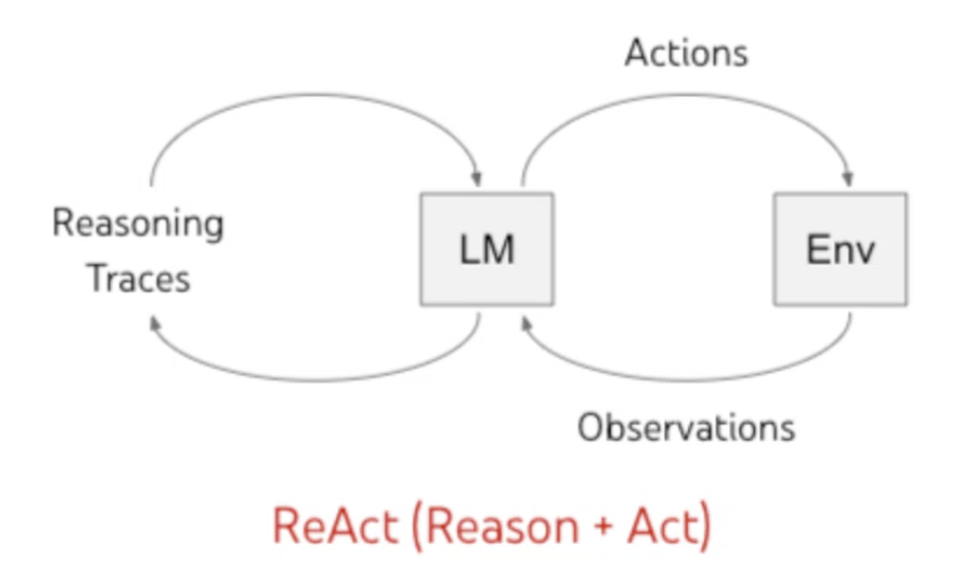
- - -

- - -
**ReAct 참고 논문**
- https://arxiv.org/abs/2210.03629

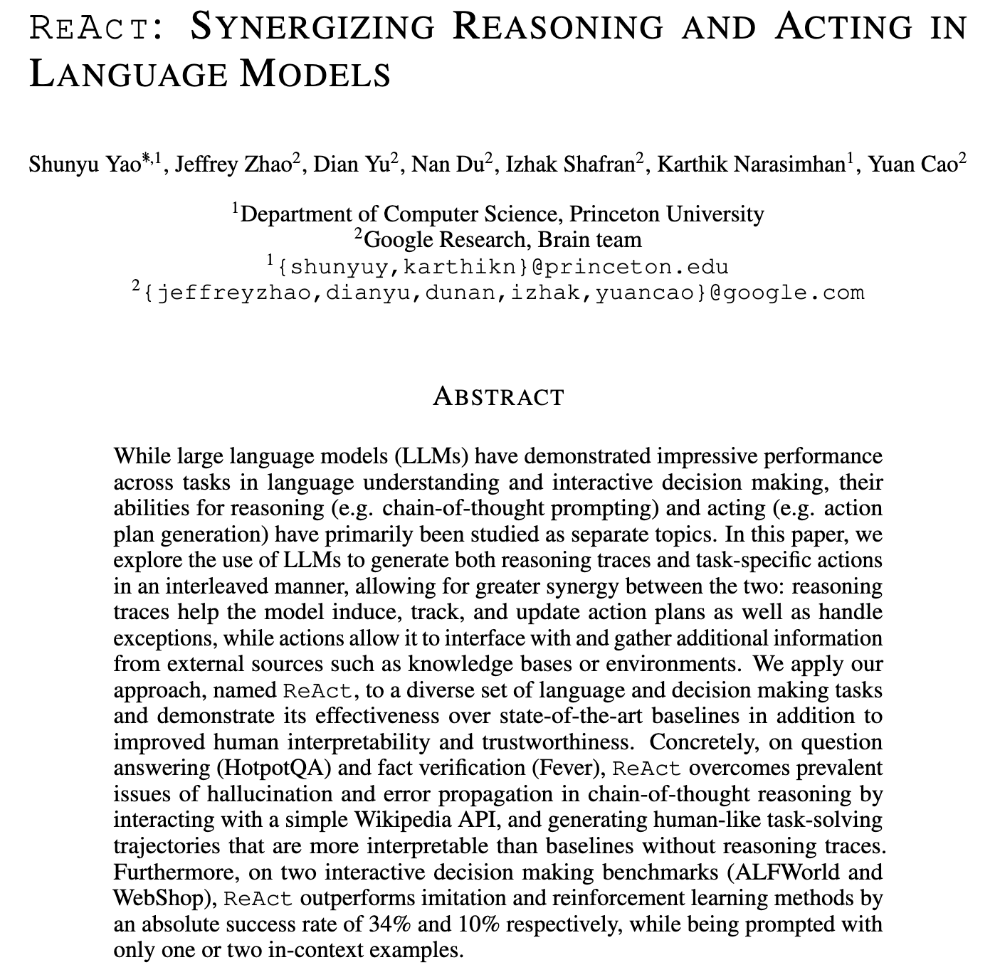
- - -

**ReAct 기법의 처리 과정**
- 1 단계 : 결과물을 출력하는데 필요한 행동(act)과 이유(reason)를 추론한다.
- 2 단계 : 외부 자원의 도움을 받아 행동을 수행 하고, 그 결과를 가져온다.
- 3 단계 : 그 행동에 대한 결과로부터 다음에 수행해야 하는 행동과 이유를 추론한다.
- 4 단계 : 최종 답변을 생성할 때까지 이 과정을 반복한다.

In [ ]:
user_message = '''영화 '기생충'(2019)의 공식 포스터 \
혹은 배급사 보도자료 기준, 주연 배우(카메오·아역배우 제외) \
중에서 촬영 당시 가장 나이가 어렸던 배우는 누구입니까?
'''
response = get_response('', user_message, model='openai/gpt-4.1-nano')
print(response)

In [ ]:
instruction = '''질의 응답 작업을 수행하기 위해 다음과 같이 \
'생각(Thought)', '실행(Action)', '관찰(Observation)' 단계를 \
번갈아 순차적으로 행합니다.

- [생각] 단계에서는 현재 상황을 논리적으로 추론합니다.
- [관찰] 단계에서는 해당 [실행]을 통해 얻은 정보를 이해하고 정리합니다.
- [실행] 단계는 다음 세 가지 유형 중 하나가 될 수 있습니다.
1) <search>대상</search>
   + '대상'을 검색하여, 존재하면 첫 번째 단락(또는 요약)을 정보를 반환합니다.
   + 만약 검색 결과가 없다면, 유사어를 추천해 줄 수 있고, 필요에 따라 \
다른 관련 검색어나 유사한 항목을 추가로 검색하여 정보를 찾을 수 있습니다.
2) <lookup>키워드</lookup>
   + 현재까지 확보한 텍스트(맥락) 안에서 '키워드'가 들어간 다음 문장을 반환합니다.
   + 이는 정확히 일치(Exact Match)하는 키워드 검색만 수행하므로, 검색어를 짧게 유지하세요.
3) <finish>답변</finish>
   - 최종적으로 질문에 대한 답변을 제시하며, 작업을 종료합니다.
'''

# 예제 1: 경복궁
example1 = '''질문: 조선 시대에 창건된 경복궁(景福宮)의 명칭은 \
어떤 유교 경전에서 유래된 것인가?

[생각] - 경복궁의 이름이 어떤 경전에서 나왔는지 확인하기 위해 '경복궁'을 검색한다.
[실행] - <search>경복궁</search>
[관찰] - 경복궁은 1395년에 창건되었으며, '크나큰 복을 누린다'라는 의미를 지닌다.

[생각] - 어느 유교 경전에서 이 이름을 따왔는지 추가로 조사해야겠다.
[실행] - <lookup>이름 유래</lookup>
[관찰] - 경복궁(景福宮)이라는 명칭은 유교 경전인 '주역(周易)'의 한 구절에서 유래되었다.

[생각] - 최종 답은 '주역'
[실행] - <finish>주역</finish>
'''

# 예제 2: 직지심체요절
example2 = '''질문: 직지심체요절(Jikji)은 금속활자로 인쇄된 \
가장 오래된 책 가운데 하나로 알려져 있는데, 현재 남아 있는 \
권(卷)은 몇 권이며, 어디에 보관되어 있는가?

[생각] - 우선 '직지심체요절'에 대해 검색해서, 원래 몇 권으로 \
구성되었는지, 그리고 현존하는 권이 몇 권이며 어디에 보관 중인지 \
확인해야 한다.
[실행] - <search>직지심체요절</search>
[관찰] - 직지심체요절(直指心體要節)은 고려 시대인 1377년에 \
청주 흥덕사에서 금속활자로 인쇄된 불교 서적이다. 상·하 2권으로 \
이루어져 있지만, 현재 남아 있는 것은 하권 한 권뿐이다. 이 하권은 \
프랑스 국립도서관(BnF)에 소장되어 있으며, 2001년 유네스코 \
세계기록유산(UNESCO Memory of the World)으로 등재되었다.

[생각] - 원래 2권(상권, 하권)인데, 지금은 하권만 남아 있고, \
프랑스 국립도서관에 보관되어 있다는 내용이 확인되었다.
[실행] - <lookup>권(卷)</lookup>
[관찰] - 상·하 총 2권 중 하권만 현존한다는 내용이 재확인된다. \
상권은 현재 전해지지 않는 것으로 알려져 있다.

[생각] - 추가로 어디에 소장되는지 확인해야 한다. 이미 '프랑스 \
국립도서관(BnF)'이라고 나왔으니 좀 더 자세한 정보를 확인해보자.
[실행] - <lookup>소장</lookup>
[관찰] - 직지심체요절 하권은 1887년 프랑스 외교관에 의해 해외로 \
반출된 뒤, 현재 파리의 프랑스 국립도서관에 소장되어 있다.

[생각] - 정리하면, 직지심체요절은 원래 상·하 2권이며, 지금은 \
하권만 남아 있고 프랑스 국립도서관(BnF)에 보관 중이다. \
이것이 최종 답변이다.
[실행] - <finish>직지심체요절은 2권 중 하권만 현존하며, \
프랑스 국립도서관에 소장되어 있습니다.</finish>
'''

In [ ]:
# 1) 테스트 질문
question = '''질문: 영화 '기생충'(2019)의 공식 포스터 \
혹은 배급사 보도자료 기준, 주연 배우(카메오·아역배우 제외) \
중에서 촬영 당시 가장 나이가 어렸던 배우는 누구입니까?
'''
messages = [
    {'role': 'developer', 'content': instruction + example1 + example2},
    {'role': 'user', 'content': [{'type': 'text', 'text': question}]}
]

response = completion(
    messages=messages,
    model='openai/gpt-4.1-mini',
    temperature=0,
    stop=['[관찰]']
)
print(response.choices[0].message.content)

In [ ]:
# 2) 실제로 사용자가 검색 결과(관찰)를 구성하여 전달한다.
simulated_observation_1 = '''[관찰] - \
영화 <기생충(2019)>의 주요 출연진에는
- 송강호(1967년생),
- 이선균(1975년생),
- 조여정(1981년생),
- 최우식(1990년생),
- 박소담(1991년생),
- 장혜진(1975년생),
- 이정은(1970년생) 등이 있다.
'''

# 관찰 메시지를 대화 이력에 추가한다.
messages.append({'role': 'user', 'content': simulated_observation_1})

response = get_msg_response(
    messages=messages,
    model='openai/gpt-4.1-mini',
    temperature=0
)
print(response)

In [ ]:
# 3) (필요시 추가 정보) 두 번째 관찰 단계
simulated_observation_2 = '''[관찰] - \
최우식은 1990년 3월 26일생, 박소담은 1991년 9월 8일생이다.
'''

# 관찰 메시지를 대화 이력에 추가한다.
messages.append({'role': 'user', 'content': simulated_observation_2})

response = get_msg_response(
    messages=messages,
    model='openai/gpt-4.1-mini',
    temperature=0
)
print(response)

# 추론 모델

추론 모델은 모델이 응답의 일부로 거치는 '사고 과정'을 생성하도록 훈련되어있다. 그 결과, 추론 모델은 응답에서 더 강력한 추론 능력을 발휘할 수 있다.

추론 모델을 사용하면 이전 방식(ReAct)처럼 특별히 정교한 프롬프팅 없이도 수준 높은 답변을 얻을 수 있다. 이 기법이 효과적인 이유는 모델이 먼저 질문과 관련된 아이디어(“브레인스토밍” 또는 “생각”)를 스스로 생성하도록 유도하고, 그 결과물을 바탕으로 최종 답변을 구성하기 때문이다.

In [ ]:
user_message = '''영화 '기생충'(2019)의 공식 포스터 \
혹은 배급사 보도자료 기준, 주연 배우(카메오·아역배우 제외) \
중에서 촬영 당시 가장 나이가 어렸던 배우는 누구입니까? \
한국어로 대답하세요.
'''
response = get_response(
    '', user_message,
    model='groq/deepseek-r1-distill-llama-70b'
)
print(response)

In [ ]:
instruction = '질문에 답을 한 후, 추론 과정을 설명하세요.'

user_message = '''영화 '기생충'(2019)의 공식 포스터 \
혹은 배급사 보도자료 기준, 주연 배우(카메오·아역배우 제외) \
중에서 촬영 당시 가장 나이가 어렸던 배우는 누구입니까?
'''
response = get_response(
    instruction, user_message,
    model='openai/gpt-5'
)
print(response)

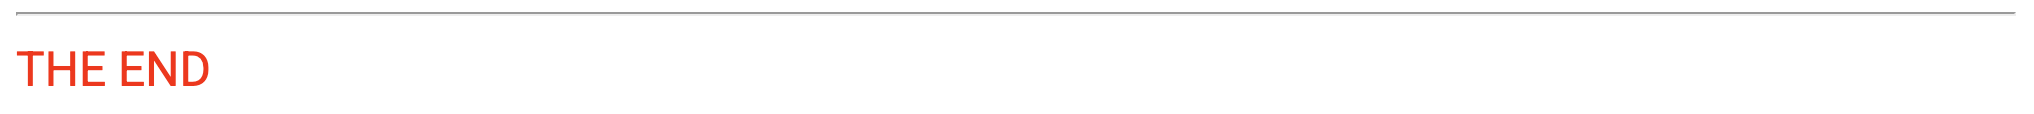